### YUXUAN's NOTEBOOK

#### Introduction
This is a 2022 regional data on the Covid-19 outbreak, which includes regions, number of tests, number of infections and reinfections, hospitalizations, and deaths. By analyzing this data, it is possible to see which regions have fewer outbreaks, fewer infections and fewer deaths.

#### Metric
My data is a situation about the distribution of the new crown epidemic. I am basing this on the number of infections,reinfections,hospitalizations and deaths in each region to determine which region is the safest. If an area has the lowest number of infections,reinfections,hospitalizations and deaths combined, then that area is the safest area in Pittsburgh. 

<ipython-input-1-32a6d01bd638>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitts['metric'] = df_pitts['infections'] + df_pitts['deaths'] + df_pitts['hospitalizations'] + df_pitts['reinfections']


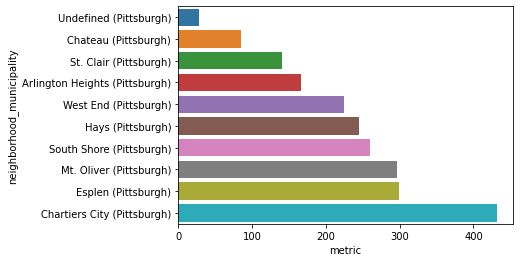

In [1]:
import pandas as pd
import re
import seaborn as sns
df = pd.read_csv("Covid.csv") #read data
reg = "\)$"
df_pitts = df[df['neighborhood_municipality'].str.contains(reg)]
df_pitts['metric'] = df_pitts['infections'] + df_pitts['deaths'] + df_pitts['hospitalizations'] + df_pitts['reinfections']
df_pitts = df_pitts.sort_values('metric', ascending=True)
df_metric = df_pitts[['neighborhood_municipality', 'metric']].head(10)
sns.barplot(x="metric", y="neighborhood_municipality", data=df_metric);


In [2]:
df_metric

,neighborhood_municipality,metric
199,Undefined (Pittsburgh),28
41,Chateau (Pittsburgh),85
185,St. Clair (Pittsburgh),140
5,Arlington Heights (Pittsburgh),166
208,West End (Pittsburgh),225
90,Hays (Pittsburgh),245
175,South Shore (Pittsburgh),260
128,Mt. Oliver (Pittsburgh),297
68,Esplen (Pittsburgh),299
40,Chartiers City (Pittsburgh),432


<AxesSubplot:>

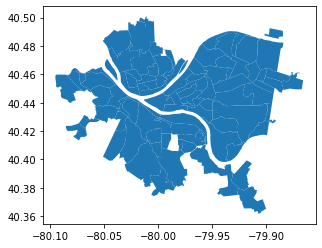

In [9]:
import pandas as pd
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

<AxesSubplot:>

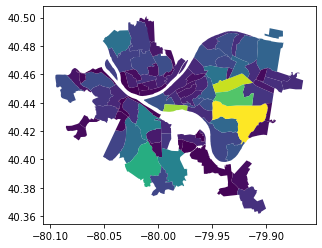

In [10]:
df['metric'] = df['infections'] + df['deaths'] + df['hospitalizations'] + df['reinfections']
df = df.sort_values('metric', ascending=True)
df['place'] = [i.removesuffix(' (Pittsburgh)') for i in df['neighborhood_municipality']]
color_map = neighborhoods.merge(df, how='left', left_on='hood', right_on='place')
color_map.plot(column='metric')

#### Conclude
By analyzing the data, the neighborhood areas of Pittsburgh were first screened. I ranked the infection and reinfections rates,the number of hospitalizations, and mortality rates for each area by adding up several items of data and then ranking them from lowest to highest. I concluded that Chateau had the lowest risk of infection or death, so it was the safest place I selected.